In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Social_Network_Ads.csv to Social_Network_Ads.csv


In [3]:
df = pd.read_csv('/content/Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
# drop user id and gender -
df = df.iloc[:,2:]
df.head()

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


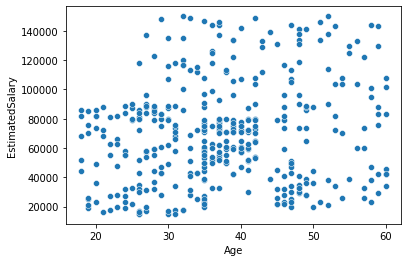

In [5]:
sns.scatterplot(df.iloc[:,0],df.iloc[:,1]) # df['Age],df['EstimatedSalary']
plt.show()

In [6]:
# splitting dependent and independent variables - 
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [7]:
x.head()

,Age,EstimatedSalary
0,19,19000
1,35,20000
2,26,43000
3,27,57000
4,19,76000


In [8]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Purchased, dtype: int64

In [9]:
# split data in train test -
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=101)

In [11]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense

In [13]:
model = Sequential()
model.add(Dense(128,activation = 'relu',input_dim=2))
model.add(Dense(1,activation = 'sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 128)               384       
                                                                 
 dense_3 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [15]:
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 5s 54ms/step - loss: 9835.7373 - accuracy: 0.3656 - val_loss: 7598.2251 - val_accuracy: 0.3250
Epoch 2/100
10/10 [==============================] - 0s 7ms/step - loss: 4757.0298 - accuracy: 0.3656 - val_loss: 2064.4304 - val_accuracy: 0.3250
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 984.7549 - accuracy: 0.5281 - val_loss: 1159.9271 - val_accuracy: 0.6750
Epoch 4/100
10/10 [==============================] - 0s 6ms/step - loss: 890.5577 - accuracy: 0.6344 - val_loss: 79.3559 - val_accuracy: 0.3250
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 253.1349 - accuracy: 0.4594 - val_loss: 189.7750 - val_accuracy: 0.6750
Epoch 6/100
10/10 [==============================] - 0s 7ms/step - loss: 132.5754 - accuracy: 0.5750 - val_loss: 3.9820 - val_accuracy: 0.6750
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 49.3283 - accuracy: 0.5531 - val_loss: 12.6153 - val_a

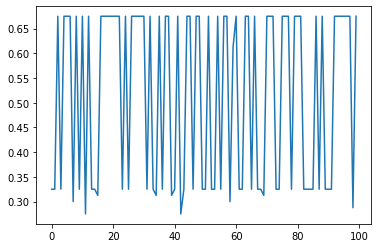

In [16]:
plt.plot(history.history['val_accuracy'])
# range btw 35 to 65 - 

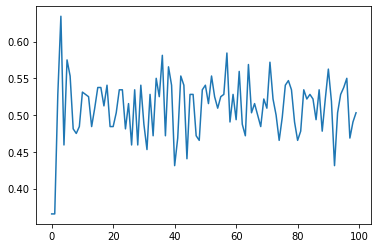

In [17]:
plt.plot(history.history['accuracy'])

#### Feature Scaling(Standardization) - 

In [19]:
from sklearn.preprocessing import StandardScaler
x_train_sc = StandardScaler().fit_transform(x_train)
x_test_sc = StandardScaler().fit_transform(x_test)

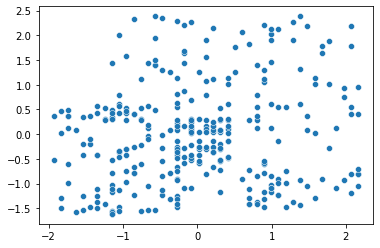

In [20]:
sns.scatterplot(x_train_sc[:,0],x_train_sc[:,1]) # Standardization range -3 to 3
plt.show()

In [21]:
model1 = Sequential()
model1.add(Dense(128,activation = 'relu',input_dim=2))
model1.add(Dense(1,activation = 'sigmoid'))
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 128)               384       
                                                                 
 dense_5 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [22]:
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [23]:
# drastic improvement in accuracy - 
history = model1.fit(x_train_sc,y_train,validation_data=(x_test_sc,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 0.6712 - accuracy: 0.5281 - val_loss: 0.6341 - val_accuracy: 0.7375
Epoch 2/100
10/10 [==============================] - 0s 9ms/step - loss: 0.6154 - accuracy: 0.7812 - val_loss: 0.5803 - val_accuracy: 0.8250
Epoch 3/100
10/10 [==============================] - 0s 7ms/step - loss: 0.5681 - accuracy: 0.8094 - val_loss: 0.5350 - val_accuracy: 0.8375
Epoch 4/100
10/10 [==============================] - 0s 9ms/step - loss: 0.5283 - accuracy: 0.8406 - val_loss: 0.4959 - val_accuracy: 0.8500
Epoch 5/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4942 - accuracy: 0.8500 - val_loss: 0.4611 - val_accuracy: 0.8625
Epoch 6/100
10/10 [==============================] - 0s 9ms/step - loss: 0.4644 - accuracy: 0.8562 - val_loss: 0.4309 - val_accuracy: 0.8625
Epoch 7/100
10/10 [==============================] - 0s 7ms/step - loss: 0.4378 - accuracy: 0.8656 - val_loss: 0.4042 - val_accuracy: 0.8750
Epoch 8/100


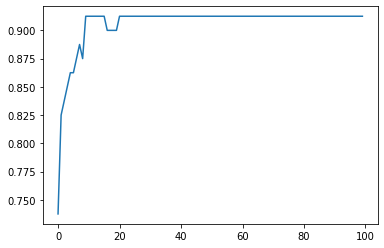

In [24]:
plt.plot(history.history['val_accuracy'])

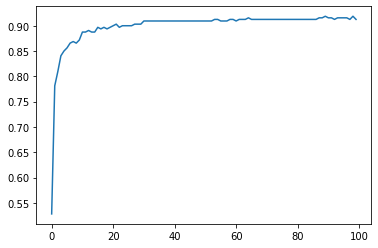

In [25]:
plt.plot(history.history['accuracy'])

#### Implementing Dropout - 
##### deals overfitting and underfitting and improves accuracy by 2%

In [26]:
from tensorflow.keras.layers import Dropout

In [32]:
# dropout percent - 10% to 50% in Dnn models
modelx = Sequential()
modelx.add(Dense(128,activation = 'relu',input_dim=2))
modelx.add(Dropout(0.3))
modelx.add(Dense(1,activation = 'sigmoid'))
modelx.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 128)               384       
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 1)                 129       
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________


In [33]:
modelx.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:

history = modelx.fit(x_train_sc,y_train,validation_data=(x_test_sc,y_test),epochs=100)

Epoch 1/100
10/10 [==============================] - 1s 19ms/step - loss: 0.6821 - accuracy: 0.6125 - val_loss: 0.6498 - val_accuracy: 0.7750
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.6337 - accuracy: 0.7156 - val_loss: 0.5993 - val_accuracy: 0.7875
Epoch 3/100
10/10 [==============================] - 0s 6ms/step - loss: 0.5883 - accuracy: 0.7750 - val_loss: 0.5550 - val_accuracy: 0.7875
Epoch 4/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5443 - accuracy: 0.8031 - val_loss: 0.5164 - val_accuracy: 0.7875
Epoch 5/100
10/10 [==============================] - 0s 5ms/step - loss: 0.5105 - accuracy: 0.8031 - val_loss: 0.4827 - val_accuracy: 0.8000
Epoch 6/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4881 - accuracy: 0.7969 - val_loss: 0.4529 - val_accuracy: 0.8000
Epoch 7/100
10/10 [==============================] - 0s 6ms/step - loss: 0.4518 - accuracy: 0.8250 - val_loss: 0.4259 - val_accuracy: 0.8000
Epoch 8/100


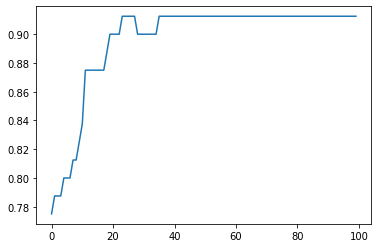

In [35]:
plt.plot(history.history['val_accuracy'])

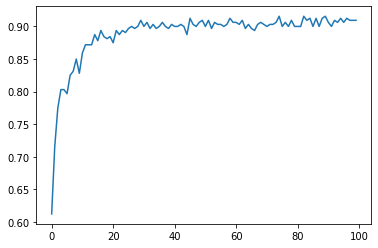

In [36]:
plt.plot(history.history['accuracy'])